In [25]:
%matplotlib inline
pwd  = %pwd

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import os


In [4]:
# the dataset was scrapped from the internet using BS4 and saved to excel file
file_name = "NRDC-trump_lies.csv"
df_import = pd.read_csv(file_name)
df = df_import.copy()

In [5]:
df

,Lie
0,I’m not denying climate change. But it could v...
1,I will say this. I don’t want to give trillion...
2,"Look, scientists also have a political agenda."
3,The ice caps were going to melt. They were goi...
4,I have a very open mind about it. We’re going ...
...,...
61,We have seen how this tragic federal overreach...
62,Our precious national treasures must be protec...
63,Public lands will once again be for public use.
64,I’ve spoken with many state and local leaders―...


In [100]:

def create_wordcloud(series):
    #numpy image file of mask image
    mask_stencil = np.array(Image.open(os.path.join(pwd,"Trump_mask.png")))
    
    
    comment_words = ''
    
    # setting stopwords to not include
    stopwords = set(STOPWORDS)
    stopwords.add("S")
    stopwords.add("t")
    stopwords.add("re")
    
    # iterate through the csv file
    for val in series:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    mask = mask_stencil,
                    contour_width=3, 
                    contour_color='orange',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
  
    # plot the WordCloud image                       
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis("off")
    plt.title("WordCloud of Trumps Biggest Lies\nData Scraped from nrdc.org/trump-lies")

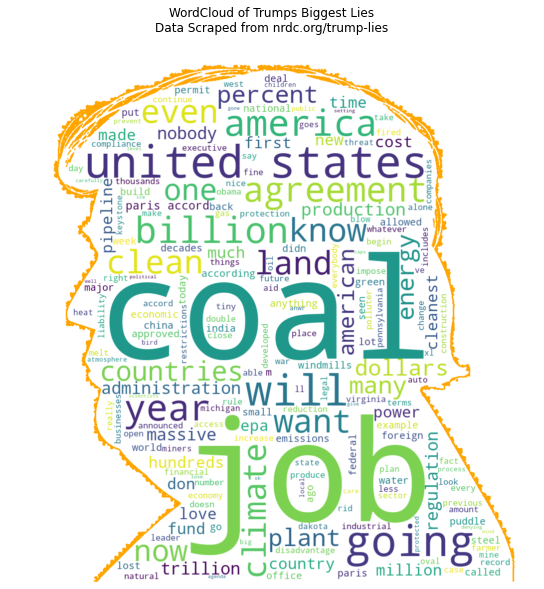

In [101]:
create_wordcloud(df.Lie)
plt.savefig("NRDC_Trump_lies.png")